# Маркетинговая аналитика для Яндекс.Афиши

## 1. Загрузка и предобработка данных

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df_list = ['costs','orders_log','visits_log']
df_dict = {}
for name in df_list:
    try:
        df_dict[name] = pd.read_csv(f'datasets/{name}.csv')  # Локальный путь
    except:
        df_dict[name] = pd.read_csv(f'/datasets/{name}.csv')  # Серверный путь
    print(name)
    df_dict[name].info()   
    display(df_dict[name].head())
    print()

#Настроем вывод данных с точностью до 2х знаков после запятой
    pd.set_option('display.float_format', lambda x: '%.2f' % x)

costs
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08



orders_log
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450



visits_log
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


**Структура visits_log**
- Uid — уникальный идентификатор пользователя - тип данных соответствует данным
- Device — категория устройства пользователя - тип данных соответствует данным
- Start Ts — дата и время начала сессии - тип данных следует привести к дата-время
- End Ts — дата и время окончания сессии - тип данных следует привести к дата-время
- Source Id — идентификатор источника перехода на сайт - тип данных соответствует данным

**Структура orders_log**
- Uid — уникальный идентификатор пользователя- тип данных соответствует данным
- Buy Ts — дата и время заказа - тип данных следует привести к дата-время
- Revenue — сумма заказа - тип данных соответствует данным

**Структура costs**
- source_id — идентификатор рекламного источника- тип данных соответствует данным
- dt — дата проведения рекламной кампании - тип данных следует привести к дата-время
- costs — расходы на эту кампанию- тип данных соответствует данным

В названиях столбцов имеются пробелы- заменяем на '_'

В названиях столбцов присутствуют заглавные буквы- приведем все к низнему регистру

In [5]:
for name in df_list:
    df_dict[name].columns = df_dict[name].columns.str.lower()
    
    

df_dict['visits_log'].rename(columns = {'start ts': 'start_ts'}, inplace = True) 
df_dict['visits_log'].rename(columns = {'source id': 'source_id'}, inplace = True) 
df_dict['visits_log'].rename(columns = {'end ts': 'end_ts'}, inplace = True) 
df_dict['orders_log'].rename(columns = {'buy ts': 'buy_ts'}, inplace = True) 
    
for name in df_list:
    print(name)
    display(df_dict[name].head())
    display(df_dict[name].info())
    print() 

costs


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None


orders_log


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None


visits_log


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end_ts     359400 non-null  object
 2   source_id  359400 non-null  int64 
 3   start_ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

**Приведение типов**

In [6]:
df_dict['visits_log']['start_ts'] = pd.to_datetime(df_dict['visits_log']['start_ts'])
df_dict['visits_log']['end_ts'] = pd.to_datetime(df_dict['visits_log']['end_ts'])
df_dict['orders_log']['buy_ts'] = pd.to_datetime(df_dict['orders_log']['buy_ts'])
df_dict['costs']['dt'] = pd.to_datetime(df_dict['costs']['dt'])

for name in df_list:
    df_dict[name].info()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     ----------

In [7]:
# Проверка на дубликаты

for name in df_list:
    print(name)
    display(df_dict[name].duplicated().sum())
    print()

costs


0


orders_log


0


visits_log


0

### Результат предобработки

1. Столбцы переименованы
2. Тип данных преобразован
3. Дубликатов в данных не выявлено

## 2. Рассчет метрик и построение графиков

Посчитайте метрики трёх видов:
- продуктовые,
- метрики электронной коммерции,
- маркетинговые.

Отобразите на графиках изменения каждой метрики во времени. Всякий раз старайтесь подобрать наиболее подходящий тип визуализации: в некоторых случаях может быть уместна тепловая карта когортного анализа.

### 2.1. Продуктовые метрики

#### 2.1.1. Рассчитайте DAU, WAU и MAU. Вычислите средние значения этих метрик за весь период. Отобразите изменения метрик во времени на графиках;

In [8]:
df_dict['visits_log']['year']=df_dict['visits_log']['start_ts'].dt.year
df_dict['visits_log']['month']=df_dict['visits_log']['start_ts'].astype('datetime64[M]')
df_dict['visits_log']['week']=df_dict['visits_log']['start_ts'].astype('datetime64[W]')
df_dict['visits_log']['date']=df_dict['visits_log']['start_ts'].dt.date
    
display(df_dict['visits_log'].head())

,device,end_ts,source_id,start_ts,uid,year,month,week,date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27


In [9]:
mau_total = (
    df_dict['visits_log'].groupby(['year', 'month'])
    .agg({'uid': 'nunique'})
    .mean()
)
dau_total = df_dict['visits_log'].groupby('date').agg({'uid': 'nunique'}).mean()
wau_total = (
    df_dict['visits_log'].groupby(['year', 'week'])
    .agg({'uid': 'nunique'})
    .mean()
)
print('Средние метрики за весь период')
print('DAU:')
print(dau_total)
print()
print('WAU:')
print(wau_total)
print()
print('MAU:')
print(mau_total)


Средние метрики за весь период
DAU:
uid   907.99
dtype: float64

WAU:
uid   5621.70
dtype: float64

MAU:
uid   23228.42
dtype: float64


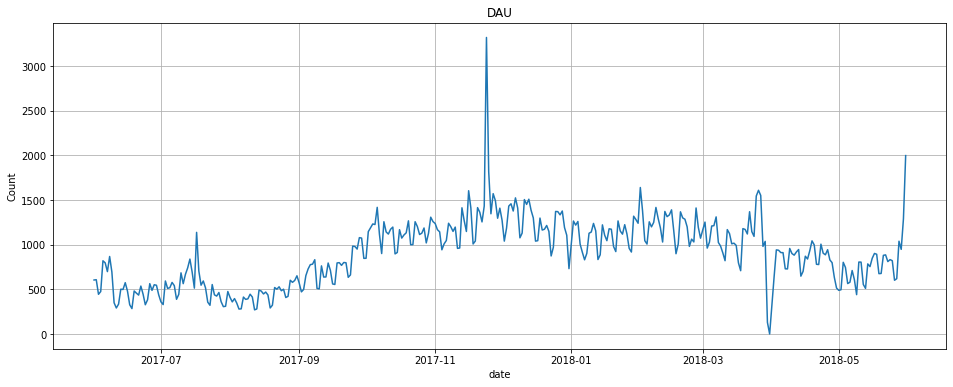

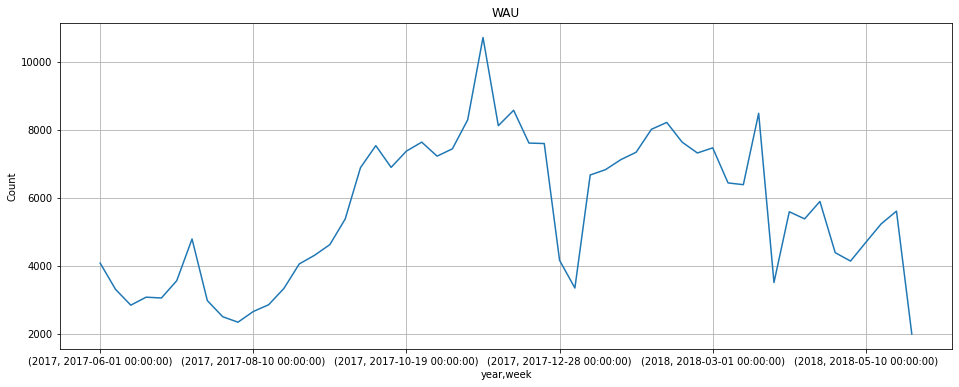

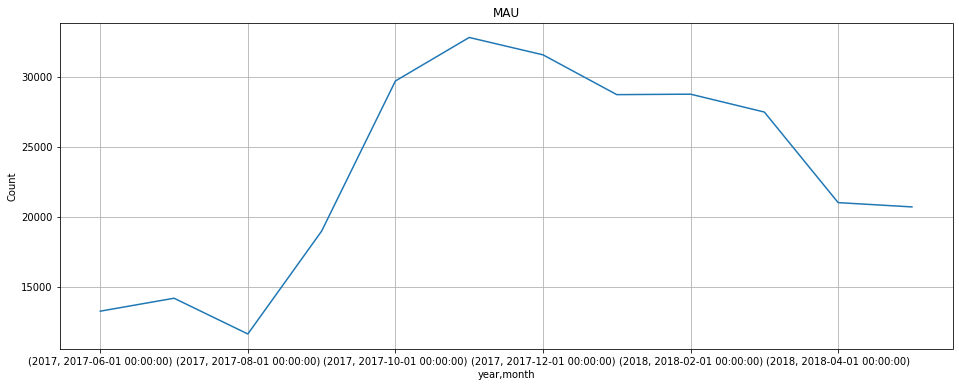

In [10]:
mau =df_dict['visits_log'].groupby(['year', 'month']).agg({'uid': 'nunique'})
dau = df_dict['visits_log'].groupby('date').agg({'uid': 'nunique'})
wau = df_dict['visits_log'].groupby(['year', 'week']).agg({'uid': 'nunique'})
lst = {'dau': dau, 'wau': wau,'mau' : mau}
for k,v in lst.items():
    lst[k].plot(grid=True, figsize=(16,6), title=k.upper(), legend=False)
    plt.ylabel("Сount")
    plt.show()

- [картинка 1](img/img1.jpg)

#### Вывод

Средние метрики за весь период составляют:
DAU- 907.99, WAU- 5716.25, MAU -23228.42
По графикам видны большие всплески в декабре, падение в апреле и низкая активность в летние месяца, что намекает на сезонность. Например новогодние утреники в декабре и театральные каникулы летом

#### 2.1.2. Определите, сколько раз за день пользователи в среднем заходят на сайт. Постройте график, отражающий изменения метрики во времени;

In [11]:
#среднее кол-во визитов в день/ кол-во дней
mean_sessions = df_dict['visits_log'].groupby('date').agg({'uid': ['count','nunique']})
mean_sessions['mean'] = mean_sessions['uid']['count'] / mean_sessions['uid']['nunique']
mean_sessions['mean'].mean()

1.082169644003972

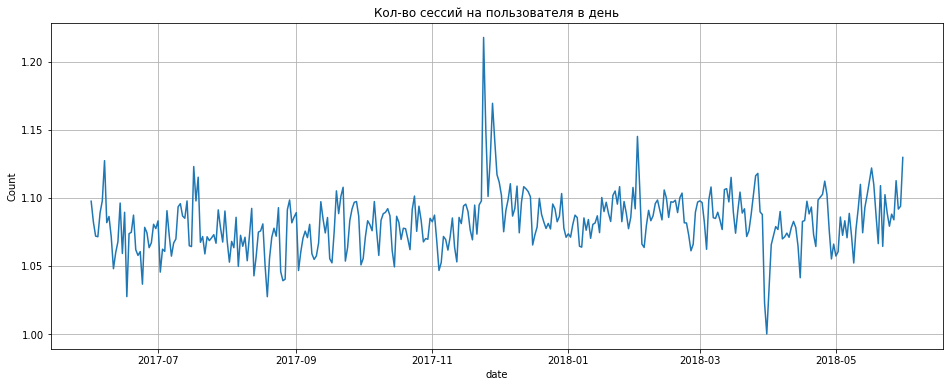

In [12]:
mean_sessions['mean'].plot(
    grid=True, figsize=(16,6), title='Кол-во сессий на пользователя в день',
    legend=False)
plt.ylabel("Сount")
plt.show()

- [картинка 2](img/img2.jpg)

#### Выводы

В среднем кол-во сессий в день на 1 пользователя составляет -1.08. На графике так же выражена сезонность, особенно всплеск в декабре

#### 2.1.3. Исследуйте, сколько времени пользователи проводят на сайте. Узнайте продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, постройте график распределения. Изменение продолжительности сессий во времени изучать необязательно;

In [13]:
df_dict['visits_log'].query('end_ts < start_ts')

,device,end_ts,source_id,start_ts,uid,year,month,week,date
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986,2018,2018-03-01,2018-03-22,2018-03-25
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453,2018,2018-03-01,2018-03-22,2018-03-25


Выявлено 2 строки, где время начала сессии больше времени ее окончания, считаем багом и удаляем

In [14]:
df_dict['visits_log'] = df_dict['visits_log'].query('end_ts >= start_ts')
df_dict['visits_log']['session_len_sec'] = (df_dict['visits_log']['end_ts'] - df_dict['visits_log']['start_ts']).dt.seconds
df_dict['visits_log']['session_len_sec'].describe()

count   359398.00
mean       643.04
std        997.11
min          0.00
25%        120.00
50%        300.00
75%        840.00
max      42660.00
Name: session_len_sec, dtype: float64

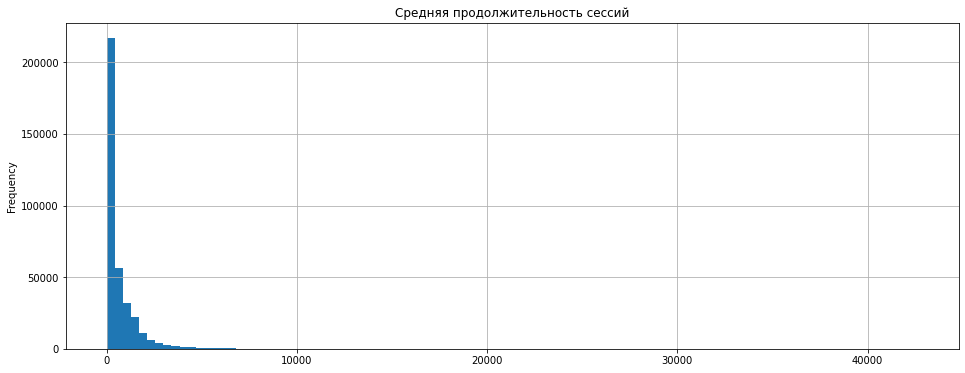

Самая частая продолжительность сессий: 0    60
Name: session_len_sec, dtype: int64


In [15]:
# средняя продолжительность сессии

df_dict['visits_log']['session_len_sec'].plot(
    kind='hist', bins=100, figsize=(16,6), grid=True, title='Средняя продолжительность сессий'
) 
plt.show()
print('Самая частая продолжительность сессий:', df_dict['visits_log']['session_len_sec'].mode())

- [картинка](img/img3.jpg)

#### Выводы

На графике видно ассиметричное( экспоненциальное) распределения, по этому для определения частоты поссещения лучше подходит мода, т.к среднее и медиана будут подвержены смещению в большую сторону.
Мода покакзывает, что типичная сессия пользователей составляет от 0 до 60 сек
Сессия в 1 минуту вполне нормально т.к. далеко не все посетители совершают покупки а зоходять больше что бы изучить предложение сервиса. Я бы предложила воспользоваться доп. методами для удержания на сайте- акции промо партнеров и т.п. это увеличит время на сайте, но никак не скажется на конверсию в покупки билетов

#### 2.1.4. Рассчитайте Retention Rate, применяя когортный анализ. Покажите изменения метрики во времени на графике. Найдите средний Retention Rate на второй месяц «жизни» когорт.

In [16]:
first_activity_dates = df_dict['visits_log'].groupby(['uid'])['start_ts'].min()
first_activity_dates.name = 'first_activity_dates'
df_dict['visits_log'] = df_dict['visits_log'].join(first_activity_dates, on='uid')
df_dict['visits_log']['first_activity_month'] = df_dict['visits_log']['first_activity_dates'].astype('datetime64[M]')
df_dict['visits_log'].head()

,device,end_ts,source_id,start_ts,uid,year,month,week,date,session_len_sec,first_activity_dates,first_activity_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27,0,2017-12-27 14:06:00,2017-12-01


In [17]:
df_dict['visits_log']['cohort_lifetime'] = (df_dict['visits_log']['start_ts'].astype('datetime64[M]')
                                            - df_dict['visits_log']['first_activity_month'])
df_dict['visits_log']['cohort_lifetime'] = (df_dict['visits_log']['cohort_lifetime'] 
                                            / np.timedelta64(1, 'M')
                                           ).round().astype('int')

cohorts = df_dict['visits_log'].groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts

,first_activity_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


In [18]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month', 'uid']]
initial_users_count =initial_users_count.rename( columns={'uid': 'cohort_users'})
initial_users_count

,first_activity_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [19]:
cohorts= cohorts.merge(initial_users_count, on='first_activity_month')
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users'] 
cohorts

,first_activity_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.00
1,2017-06-01,1,1043,13259,0.08
2,2017-06-01,2,713,13259,0.05
3,2017-06-01,3,814,13259,0.06
4,2017-06-01,4,909,13259,0.07
...,...,...,...,...,...
73,2018-03-01,1,861,20589,0.04
74,2018-03-01,2,557,20589,0.03
75,2018-04-01,0,15709,15709,1.00
76,2018-04-01,1,760,15709,0.05


In [20]:
retention_pivot = cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)
retention_pivot = retention_pivot.drop([0], axis=1)
retention_pivot

cohort_lifetime,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,
2017-06-01,0.08,0.05,0.06,0.07,0.07,0.06,0.06,0.05,0.05,0.04,0.04
2017-07-01,0.06,0.05,0.06,0.06,0.05,0.05,0.05,0.04,0.03,0.03,NaN
2017-08-01,0.08,0.06,0.06,0.05,0.04,0.04,0.04,0.03,0.03,NaN,NaN
2017-09-01,0.09,0.07,0.05,0.04,0.04,0.04,0.02,0.02,NaN,NaN,NaN
2017-10-01,0.08,0.05,0.04,0.03,0.03,0.02,0.02,NaN,NaN,NaN,NaN
2017-11-01,0.08,0.04,0.04,0.03,0.02,0.02,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.06,0.04,0.03,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.06,0.04,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.06,0.03,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(93.49999999999999, 0.5, 'Месяц первой активности')

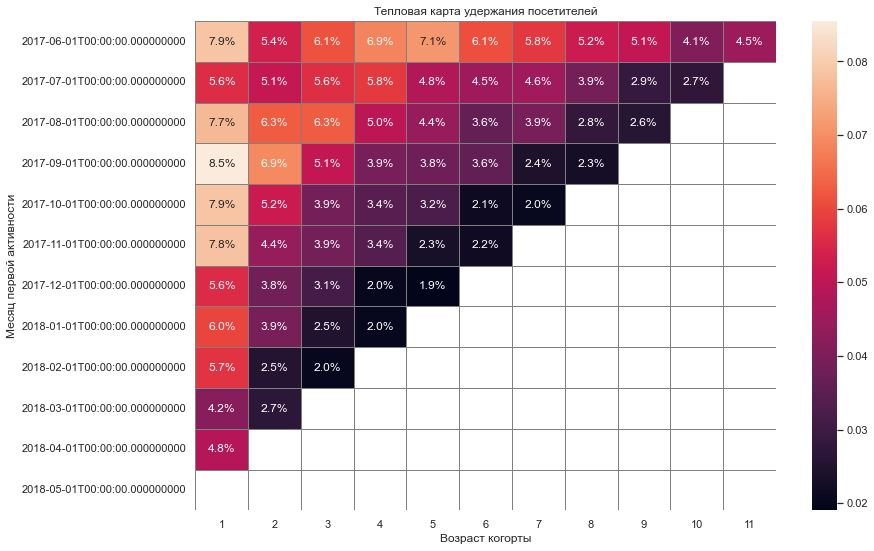

In [21]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Тепловая карта удержания посетителей')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
plt.xlabel("Возраст когорты")
plt.ylabel("Месяц первой активности")

- [картинка](img/img4.jpg)

In [22]:
retention_pivot.mean()

cohort_lifetime
1    0.07
2    0.05
3    0.04
4    0.04
5    0.04
6    0.04
7    0.04
8    0.04
9    0.04
10   0.03
11   0.04
dtype: float64

In [23]:
retention_pivot[1].mean()

0.06516659710392834

#### Выводы

Средний показатель удержания на 2й месяц составляет всего 6,5%, далее показатель падает до 4% в среднем.
Нужно работать над улучшением данного показателя

### 2.2. Метрики электронной коммерции

#### 2.2.1. Исследуйте, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки. Изучать изменение этой метрики во времени необязательно;

In [24]:
first_activity_dates = df_dict['visits_log'].groupby(['uid']).agg({'start_ts': 'min'})
first_activity_dates = first_activity_dates.rename(columns={'start_ts': 'first_start_ts'})
first_activity_orders = df_dict['orders_log'].groupby(['uid']).agg({'buy_ts': 'min'})
first_activity_orders = first_activity_orders.rename(columns={'buy_ts': 'first_buy_ts'})

first_activity_orders.head()

,first_buy_ts
uid,
313578113262317,2018-01-03 21:51:00
1575281904278712,2017-06-03 10:13:00
2429014661409475,2017-10-11 18:33:00
2464366381792757,2018-01-28 15:54:00
2551852515556206,2017-11-24 10:14:00


In [25]:
visits_orders = first_activity_orders.merge(first_activity_dates, on='uid').reset_index()
visits_orders.head()

,uid,first_buy_ts,first_start_ts
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [26]:
visits_orders['visit_to_purchase_time'] = (visits_orders['first_buy_ts'] 
                                           - visits_orders['first_start_ts']
                                          )
visits_orders['visit_to_purchase_time'] = (pd.to_timedelta(visits_orders['visit_to_purchase_time'])
                                           / np.timedelta64(1, 's')).round().astype('int')
display(visits_orders['visit_to_purchase_time'].describe())


count      36523.00
mean     1460410.55
std      4067086.48
min            0.00
25%          240.00
50%          960.00
75%       173820.00
max     31388640.00
Name: visit_to_purchase_time, dtype: float64

<AxesSubplot:>

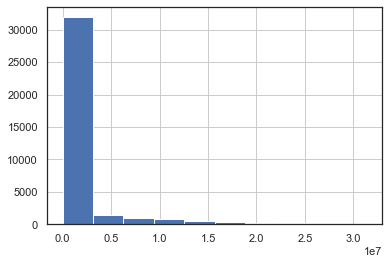

In [27]:
visits_orders['visit_to_purchase_time'].hist()

- [картинка](img/img5.jpg)

In [28]:
print('Среднее время до 1й покупки в секундах', visits_orders['visit_to_purchase_time'].median())                                 
print('Среднее время до 1й покупки в минутах', visits_orders['visit_to_purchase_time'].median()/60)  


Среднее время до 1й покупки в секундах 960.0
Среднее время до 1й покупки в минутах 16.0


#### Выводы

Для определения среднего значения используем медиану из-за большого разброса.
<s> В среднем после первого входа пользователи начинают покупать через 16 дней, при этом есть посетители, которые совершают покупки в тот же день и через год (363 дня). </s>

В среднем после первого входа пользователи начинают покупать через 960 сек- это 16 минут

#### 2.2.2. Применяя когортный анализ или другой метод, рассчитайте среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев. Изучать изменение этой метрики во времени необязательно;

In [29]:
first_orders_date =  df_dict['orders_log'].groupby(['uid'])['buy_ts'].min()
first_orders_date.name = 'first_orders_month'
df_dict['orders_log']= df_dict['orders_log'].join(first_orders_date,on='uid')

In [30]:
df_dict['orders_log']['first_orders_month'] = df_dict['orders_log']['first_orders_month'].astype('datetime64[M]')
df_dict['orders_log']['order_month'] = df_dict['orders_log']['buy_ts'].astype('datetime64[M]')
df_dict['orders_log']

,buy_ts,revenue,uid,first_orders_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01


In [31]:
cnt_cohorts_orders = (
    df_dict['orders_log'].groupby(['first_orders_month','order_month'])
    .agg({'revenue': 'count'})
    .reset_index()
)
cnt_cohorts_orders

,first_orders_month,order_month,revenue
0,2017-06-01,2017-06-01,2354
1,2017-06-01,2017-07-01,177
2,2017-06-01,2017-08-01,174
3,2017-06-01,2017-09-01,226
4,2017-06-01,2017-10-01,292
...,...,...,...
74,2018-03-01,2018-05-01,176
75,2018-04-01,2018-04-01,2495
76,2018-04-01,2018-05-01,195
77,2018-05-01,2018-05-01,3249


In [32]:
# Считаем кол-во новых пользователей в когорте
cohort_sizes = (
    df_dict['orders_log'].groupby('first_orders_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_orders_month', 'n_buyers']
cohort_sizes.head()

,first_orders_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [33]:
mean_orders = pd.merge( cnt_cohorts_orders, cohort_sizes, on='first_orders_month')
mean_orders

,first_orders_month,order_month,revenue,n_buyers
0,2017-06-01,2017-06-01,2354,2023
1,2017-06-01,2017-07-01,177,2023
2,2017-06-01,2017-08-01,174,2023
3,2017-06-01,2017-09-01,226,2023
4,2017-06-01,2017-10-01,292,2023
...,...,...,...,...
74,2018-03-01,2018-05-01,176,3533
75,2018-04-01,2018-04-01,2495,2276
76,2018-04-01,2018-05-01,195,2276
77,2018-05-01,2018-05-01,3249,2988


In [34]:
mean_orders['mean_orders']= mean_orders['revenue']/mean_orders['n_buyers']
mean_orders

,first_orders_month,order_month,revenue,n_buyers,mean_orders
0,2017-06-01,2017-06-01,2354,2023,1.16
1,2017-06-01,2017-07-01,177,2023,0.09
2,2017-06-01,2017-08-01,174,2023,0.09
3,2017-06-01,2017-09-01,226,2023,0.11
4,2017-06-01,2017-10-01,292,2023,0.14
...,...,...,...,...,...
74,2018-03-01,2018-05-01,176,3533,0.05
75,2018-04-01,2018-04-01,2495,2276,1.10
76,2018-04-01,2018-05-01,195,2276,0.09
77,2018-05-01,2018-05-01,3249,2988,1.09


In [35]:
mean_orders['age'] = (mean_orders['order_month']- mean_orders['first_orders_month']) / np.timedelta64(1,'M')
mean_orders['age'] = mean_orders['age'].round().astype('int64')
mean_orders

,first_orders_month,order_month,revenue,n_buyers,mean_orders,age
0,2017-06-01,2017-06-01,2354,2023,1.16,0
1,2017-06-01,2017-07-01,177,2023,0.09,1
2,2017-06-01,2017-08-01,174,2023,0.09,2
3,2017-06-01,2017-09-01,226,2023,0.11,3
4,2017-06-01,2017-10-01,292,2023,0.14,4
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,176,3533,0.05,2
75,2018-04-01,2018-04-01,2495,2276,1.10,0
76,2018-04-01,2018-05-01,195,2276,0.09,1
77,2018-05-01,2018-05-01,3249,2988,1.09,0


In [36]:
pivot = mean_orders.pivot_table(
    index='first_orders_month',
    columns='age',
    values='mean_orders'
).cumsum(axis = 1)
pivot.round(2).fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_orders_month,,,,,,,,,,,,
2017-06-01,1.16,1.25,1.34,1.45,1.59,1.70,1.84,1.92,2.03,2.10,2.15,2.19
2017-07-01,1.14,1.19,1.25,1.31,1.34,1.39,1.42,1.44,1.47,1.49,1.51,
2017-08-01,1.12,1.20,1.27,1.33,1.39,1.44,1.47,1.53,1.56,1.60,,
2017-09-01,1.14,1.22,1.28,1.35,1.37,1.42,1.46,1.48,1.50,,,
2017-10-01,1.14,1.22,1.25,1.28,1.31,1.34,1.35,1.38,,,,
2017-11-01,1.18,1.28,1.32,1.37,1.41,1.42,1.45,,,,,
2017-12-01,1.15,1.21,1.26,1.30,1.32,1.34,,,,,,
2018-01-01,1.12,1.19,1.24,1.25,1.28,,,,,,,
2018-02-01,1.12,1.18,1.21,1.22,,,,,,,,


In [37]:
pivot[5].mean()

1.4341911542792218

### Вывод

В среднем 1 пользователь за 6 месяцев совершает 1,43 покупок

2.2.3. Рассчитайте средний чек, применяя группировку по времени совершения покупки. Когортный анализ не подходит — он может исказить расчёты. Постройте график, отражающий изменения метрики во времени;


In [38]:
df_dict['orders_log']['revenue'].mean()

4.999646930477041

In [39]:
mean_orders = df_dict['orders_log'].groupby('order_month').agg({'uid': 'nunique', 'revenue': 'sum'})
mean_orders = mean_orders.rename(columns={'uid': 'uid_count'})
mean_orders['mean_order'] = mean_orders['revenue']/ mean_orders['uid_count']
mean_orders

,uid_count,revenue,mean_order
order_month,,,
2017-06-01,2023,9557.49,4.72
2017-07-01,1984,12539.47,6.32
2017-08-01,1472,8758.78,5.95
2017-09-01,2750,18345.51,6.67
2017-10-01,4675,27987.70,5.99
2017-11-01,4547,27069.93,5.95
2017-12-01,4942,36388.60,7.36
2018-01-01,3898,19417.13,4.98
2018-02-01,4258,25560.54,6.00


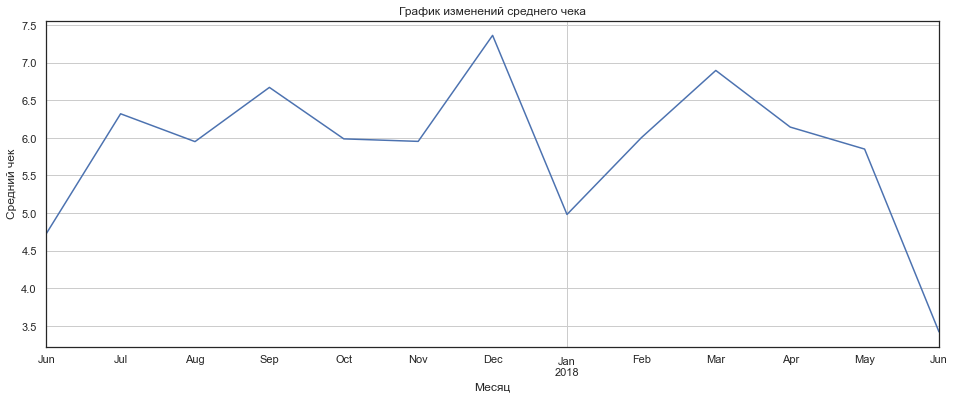

In [40]:
mean_orders['mean_order'].plot(
    grid=True, figsize=(16,6), title='График изменений среднего чека',legend=False)
plt.xlabel("Месяц")
plt.ylabel("Средний чек")
plt.show()

- [картинка](img/img6.jpg)

#### Вывод

Средний чек за весь период составляет 4,99. 
В декабре средний чек возрос до 7,36, что обусловлено ростом кол-ва посещений сайта.
В летний период несмотря на снижение активности пользователей сайта средний чек все равно выше общего среднего, что весьма интересно.

#### 2.2.4. Выясните, как меняется LTV на покупателя по когортам. Помните, что LTV — накопительная метрика. Рассчитайте средний LTV по когортам за 6 месяцев; в расчёт включайте когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%. Отразите изменения метрики во времени на графике;

In [41]:
#Выделяем месяцы из дат в таблицах с заказами
df_dict['orders_log']['order_month'] = df_dict['orders_log']['buy_ts'].astype('datetime64[M]')

#Получаем месяц первой покупки каждого покупателя
first_orders = df_dict['orders_log'].groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [42]:
#Считаем кол-во новых покупателей за каждый месяц
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [43]:
#Добавляем месяц первой покупки в таблицу заказов
orders_new = pd.merge(df_dict['orders_log'],first_orders, on='uid')
orders_new.head()

,buy_ts,revenue,uid,first_orders_month,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01


In [44]:
#групируем таблицу заказов по месяцам первой покупки
ltv_cohorts = (
    orders_new.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
ltv_cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [45]:
#Добавляем показатель сколько людей первый раз совершили покупку в каждый месяц
report = pd.merge(cohort_sizes, ltv_cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [46]:
#расчет валовой прибыли
margin_rate = 1

report['gp'] = report['revenue'] * margin_rate

#Добавляем возраст коготры
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report.head()

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4


In [47]:
#Вычисляем ltv
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
)

output.fillna('')


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09-01,5.64,1.12,0.52,3.98,0.40,0.65,0.70,0.24,0.18,,,
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11-01,5.15,0.40,0.20,0.32,0.15,0.05,0.11,,,,,
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01-01,4.14,0.29,0.30,0.14,0.06,,,,,,,
2018-02-01,4.16,0.28,0.08,0.07,,,,,,,,


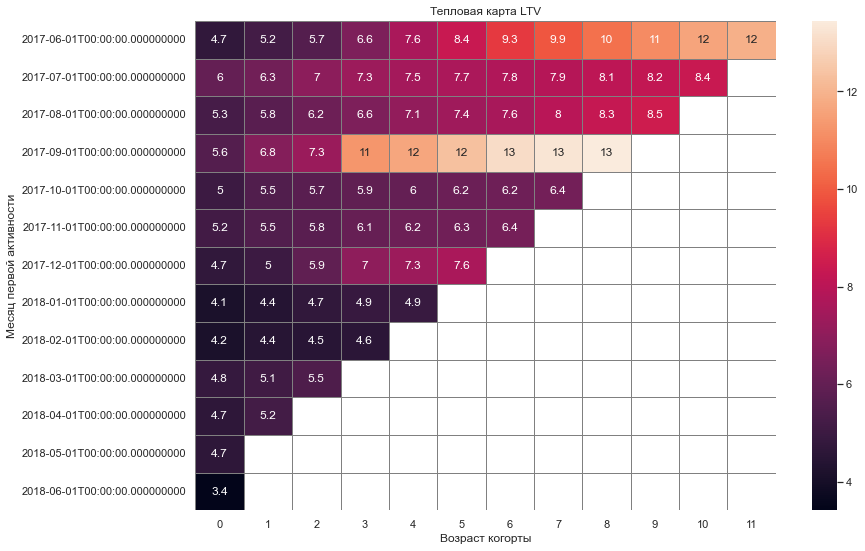

In [48]:
output_hm = output.cumsum(axis=1).round(2)
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Тепловая карта LTV')
sns.heatmap(output_hm, annot=True, linewidths=1, linecolor='gray')
plt.xlabel("Возраст когорты")
plt.ylabel("Месяц первой активности")
plt.show()

- [картинка](img/img7.jpg)

age,0,1,2,3,4,5,mean_ltv
first_order_month,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.99
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.76
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.85
2017-09-01,5.64,1.12,0.52,3.98,0.40,0.65,1.49
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.80
2017-11-01,5.15,0.40,0.20,0.32,0.15,0.05,0.91
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,1.27


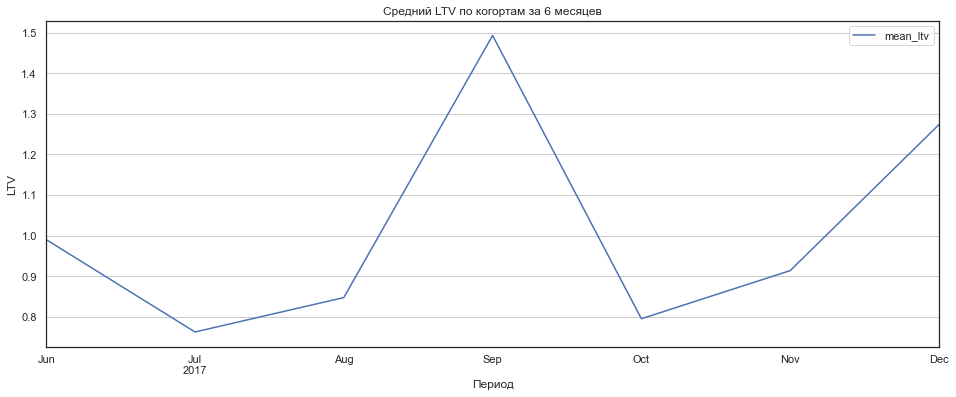

In [49]:
#Отбираем когорты прожившие более 6 месяцев и  их первые 6 месяцев жизни
output2 = output.iloc[:,:6].dropna()
output2['mean_ltv']= output.apply(lambda row: row.mean(), axis=1)
display(output2)

output2.plot(y='mean_ltv', 
    grid=True, figsize=(16,6), title='Средний LTV по когортам за 6 месяцев')
plt.xlabel("Период")
plt.ylabel("LTV")
plt.show()

- [картинка](img/img8.jpg)

#### Выводы

В среднем за 6 месяцев жизни когорт больше всего денег принесла сентябрьская когорта, их показатель LTV значительно выше остальных, при этом значительного всплеска по посещениям сервиса в этот период нет. Вероятнее всего в этот период продавались дорогие билеты

### 2.3. Маркетинговые метрики

Посчитайте и отобразите на графиках, как маркетинговые метрики различаются по рекламным источникам.
Один и тот же пользователь мог заходить на сайт из нескольких источников, поэтому важно определить «главный» источник для каждого и учитывать это в расчётах. Например, главным может стать первый источник перехода.

#### 2.3.1. Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам. Визуализируйте изменения метрик во времени.

Общая сумма расходов на маркетинг -  329131.62
Распределение трат по источникам:


,costs,percent
source_id,,
1,20833.27,6.33
2,42806.04,13.01
3,141321.63,42.94
4,61073.60,18.56
5,51757.10,15.73
9,5517.49,1.68
10,5822.49,1.77


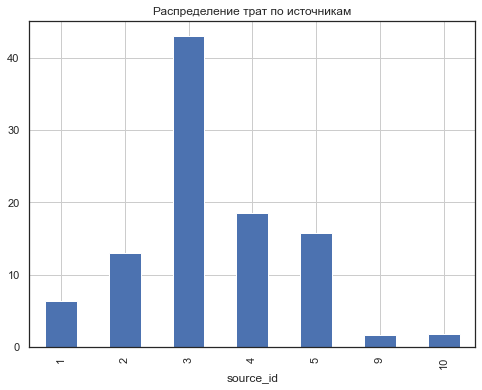

In [50]:
print('Общая сумма расходов на маркетинг - ', df_dict['costs']['costs'].sum())
print('Распределение трат по источникам:')
sm_costs = df_dict['costs'].groupby('source_id').agg({'costs': 'sum'})
sm_costs['percent']= ((sm_costs['costs']/df_dict['costs']['costs'].sum())*100).round(2)
display(sm_costs)
sm_costs['percent'].plot(kind='bar', grid=True, figsize=(8,6), title='Распределение трат по источникам') 
plt.show()

- [картинка](img/img9.jpg)

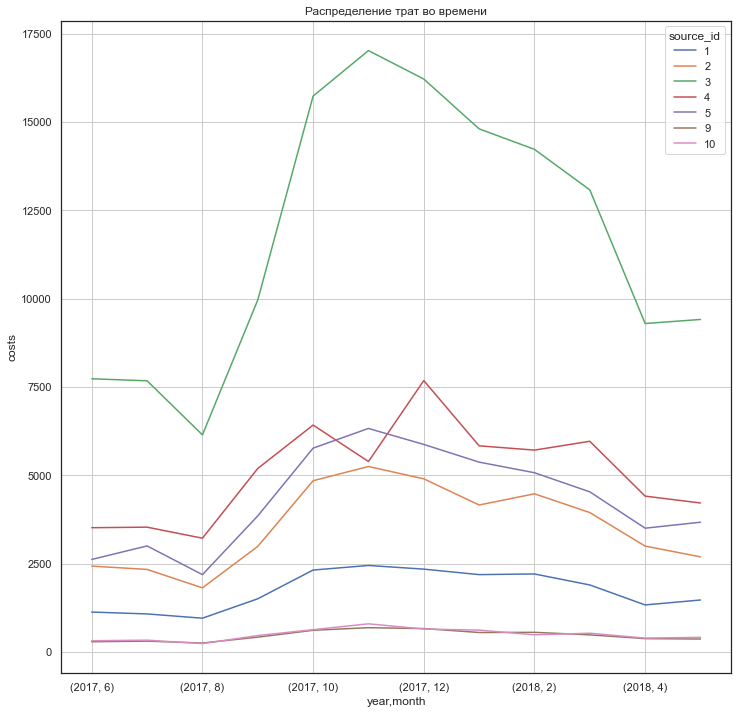

In [51]:
df_dict['costs']['year']= df_dict['costs']['dt'].dt.year
df_dict['costs']['month']= df_dict['costs']['dt'].dt.month
pivot_m_costs = df_dict['costs'].pivot_table(index = ['year', 'month'], columns ='source_id', values = 'costs', aggfunc = 'sum')
pivot_m_costs.plot(grid=True, figsize=(12,12), title='Распределение трат во времени')
plt.ylabel("costs")
plt.show()

- [картинка](img/img10.jpg)

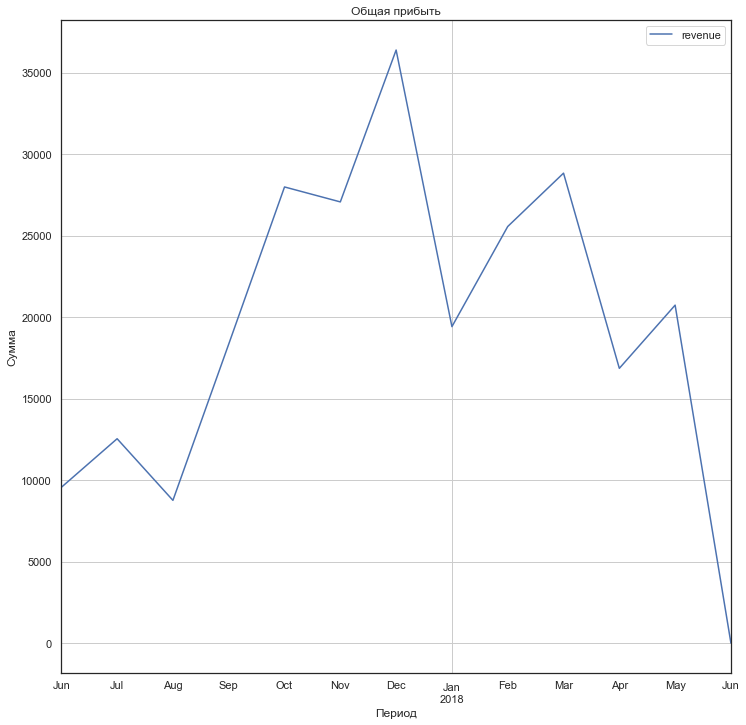

In [52]:
df_dict['orders_log'].pivot_table(index = 'order_month',  values = 'revenue', aggfunc = 'sum'
                                 ).plot(grid=True, figsize=(12,12), title='Общая прибыть')
plt.xlabel("Период")
plt.ylabel("Сумма")
plt.show()

- [картинка](img/img11.jpg)

#### Вывод

Заметно что затраты на 3й источник значительно превосходят траты на остальные источники и за весь период составили почти 43%, 
С октября по ноябрь значительно возрасли затраты по 2,3 и 5му источникам, что похоже привело к увеличению прибыли в декабре

#### 2.3.2. Рассчитайте средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Отразите изменения метрик на графиках.

In [53]:
# считаем расходы за месяц
df_dict['costs']['year_month']= df_dict['costs']['dt'].astype('datetime64[M]')
monthly_costs = df_dict['costs'].groupby(['year_month','source_id']).sum().reset_index()
monthly_costs.head() 

,year_month,source_id,costs,year,month
0,2017-06-01,1,1125.61,60510,180
1,2017-06-01,2,2427.38,60510,180
2,2017-06-01,3,7731.65,60510,180
3,2017-06-01,4,3514.80,60510,180
4,2017-06-01,5,2616.12,60510,180


В качестве источника для покупателя берем источник с которого он впервые заходил

In [54]:
visits_nead = df_dict['visits_log'][['source_id','uid','date']]
source = visits_nead.groupby(['uid'])['source_id'].first()
orders_souce = pd.merge(source, df_dict['orders_log'], left_on='uid', right_on='uid')
orders_souce = orders_souce.drop('buy_ts', 1)
orders_souce.tail() 


C:\Users\osia\AppData\Local\Temp\ipykernel_10300\2982058397.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  orders_souce = orders_souce.drop('buy_ts', 1)


,uid,source_id,revenue,first_orders_month,order_month
50410,18445407535914413204,3,0.24,2017-09-01,2017-09-01
50411,18445407535914413204,3,0.12,2017-09-01,2017-09-01
50412,18445601152732270159,2,4.22,2018-03-01,2018-03-01
50413,18446156210226471712,3,9.78,2018-02-01,2018-02-01
50414,18446167067214817906,5,7.94,2017-10-01,2017-10-01


In [55]:

report_cac = pd.merge(orders_souce, monthly_costs, how='left', left_on=['first_orders_month','source_id'], right_on=['year_month','source_id'])
report_cac.head()

,uid,source_id,revenue,first_orders_month,order_month,year_month,costs,year,month
0,313578113262317,2,0.55,2018-01-01,2018-01-01,2018-01-01,4157.74,62558.00,31.00
1,1575281904278712,10,1.22,2017-06-01,2017-06-01,2017-06-01,314.22,60510.00,180.00
2,1575281904278712,10,1.83,2017-06-01,2017-06-01,2017-06-01,314.22,60510.00,180.00
3,2429014661409475,3,73.33,2017-10-01,2017-10-01,2017-10-01,15737.24,62527.00,310.00
4,2464366381792757,5,2.44,2018-01-01,2018-01-01,2018-01-01,5371.52,62558.00,31.00


In [56]:
cac = report_cac.groupby(['source_id','year_month']).agg({'revenue': 'sum','costs': 'sum', 'uid': 'count'}).reset_index()

cac['cac'] = cac['costs'] / cac['uid']
cac

,source_id,year_month,revenue,costs,uid,cac
0,1,2017-06-01,7022.25,1179639.28,1048,1125.61
1,1,2017-07-01,3651.29,523565.44,488,1072.88
2,1,2017-08-01,1279.94,240807.93,253,951.81
3,1,2017-09-01,4478.11,754009.02,502,1502.01
4,1,2017-10-01,3598.97,1424186.25,615,2315.75
...,...,...,...,...,...,...
79,10,2018-01-01,271.39,58363.25,95,614.35
80,10,2018-02-01,345.27,68284.96,142,480.88
81,10,2018-03-01,589.99,108966.87,207,526.41
82,10,2018-04-01,295.50,46201.75,119,388.25


In [57]:
cac.groupby('source_id').agg({'revenue': 'sum', 'costs': 'sum', 'uid':'sum','cac': 'sum'}).reset_index().sort_values(by='cac', ascending=False)


,source_id,revenue,costs,uid,cac
2,3,44317.68,142184328.92,10941,141321.63
3,4,52476.33,67309931.85,12245,61073.60
4,5,40357.91,42001593.82,9310,51757.10
1,2,65152.26,29719110.69,7734,42806.04
0,1,38560.06,11959393.33,6679,20833.27
6,10,4111.34,755197.52,1451,5822.49
5,9,7076.98,1021868.53,2053,5517.49


#### Вывод

Самым дорогим по привлечению покапутелей является 3й источник.
По данной метрике видно, что самым удачным источником является 4й, т.к. стоимость 1го покупателя из данного источника в 2,3 раза ниже и привлечено больше кол-во покупателей чем из 3го источника. Так же стоит обратить внимание на 1,2 и 5й источники

#### 2.3.3. Рассчитайте ROMI по когортам в разрезе источников. Сравните окупаемость за одинаковые периоды жизни когорт. Обратите внимание, что клиенты, пришедшие из разных источников, могут иметь разный LTV. Постройте графики, отражающие изменения метрик во времени.

In [58]:
orders_visits_gp = report_cac.groupby(['first_orders_month','order_month','source_id']).agg({'revenue':'sum', 'uid':['count','nunique']}).reset_index()
orders_visits_gp.columns = ['first_orders_month','order_month','source_id','revenue_sum','uid_cnt','n_buyers']
orders_visits_gp

,first_orders_month,order_month,source_id,revenue_sum,uid_cnt,n_buyers
0,2017-06-01,2017-06-01,1,1168.45,267,203
1,2017-06-01,2017-06-01,2,1551.76,347,271
2,2017-06-01,2017-06-01,3,2466.71,621,574
3,2017-06-01,2017-06-01,4,2039.64,470,417
4,2017-06-01,2017-06-01,5,1787.68,432,368
...,...,...,...,...,...,...
510,2018-05-01,2018-05-01,4,3616.23,822,767
511,2018-05-01,2018-05-01,5,2103.24,544,510
512,2018-05-01,2018-05-01,9,200.38,56,53
513,2018-05-01,2018-05-01,10,478.93,133,117


In [59]:
orders_visits_gp['age'] = (orders_visits_gp['order_month']- orders_visits_gp['first_orders_month']) / np.timedelta64(1,'M')
orders_visits_gp['age'] = orders_visits_gp['age'].round().astype('int')

#Вычисляем ltv
orders_visits_gp['ltv'] = orders_visits_gp['revenue_sum'] / orders_visits_gp['n_buyers']

report_new = pd.merge(
    orders_visits_gp, cac, how='left', left_on=['first_orders_month','source_id'], right_on=['year_month','source_id']
)

report_new['romi'] = report_new['ltv'] / report_new['cac']
report_new

,first_orders_month,order_month,source_id,revenue_sum,uid_cnt,n_buyers,age,ltv,year_month,revenue,costs,uid,cac,romi
0,2017-06-01,2017-06-01,1,1168.45,267,203,0,5.76,2017-06-01,7022.25,1179639.28,1048.00,1125.61,0.01
1,2017-06-01,2017-06-01,2,1551.76,347,271,0,5.73,2017-06-01,6278.12,2031717.06,837.00,2427.38,0.00
2,2017-06-01,2017-06-01,3,2466.71,621,574,0,4.30,2017-06-01,3049.43,5721421.00,740.00,7731.65,0.00
3,2017-06-01,2017-06-01,4,2039.64,470,417,0,4.89,2017-06-01,2926.40,2196750.00,625.00,3514.80,0.00
4,2017-06-01,2017-06-01,5,1787.68,432,368,0,4.86,2017-06-01,4091.29,2406830.40,920.00,2616.12,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,2018-05-01,2018-05-01,4,3616.23,822,767,0,4.71,2018-05-01,3616.23,3464080.62,822.00,4214.21,0.00
511,2018-05-01,2018-05-01,5,2103.24,544,510,0,4.12,2018-05-01,2103.24,1996240.64,544.00,3669.56,0.00
512,2018-05-01,2018-05-01,9,200.38,56,53,0,3.78,2018-05-01,200.38,20281.52,56.00,362.17,0.01
513,2018-05-01,2018-05-01,10,478.93,133,117,0,4.09,2018-05-01,478.93,54511.38,133.00,409.86,0.01


In [60]:
display(report_new[report_new['source_id'] ==7])
report_new = report_new[report_new['source_id'] !=7]
uniq_source = (report_new['source_id']).unique()
uniq_source

,first_orders_month,order_month,source_id,revenue_sum,uid_cnt,n_buyers,age,ltv,year_month,revenue,costs,uid,cac,romi
149,2017-08-01,2017-08-01,7,1.22,1,1,0,1.22,NaT,NaN,NaN,NaN,NaN,NaN


array([ 1,  2,  3,  4,  5,  9, 10], dtype=int64)

Источник № 1


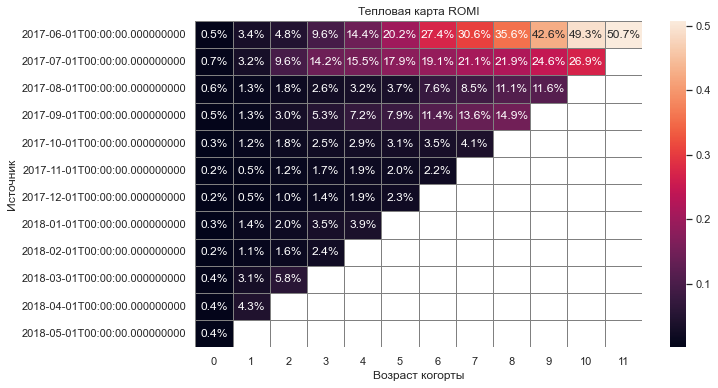

Источник № 2


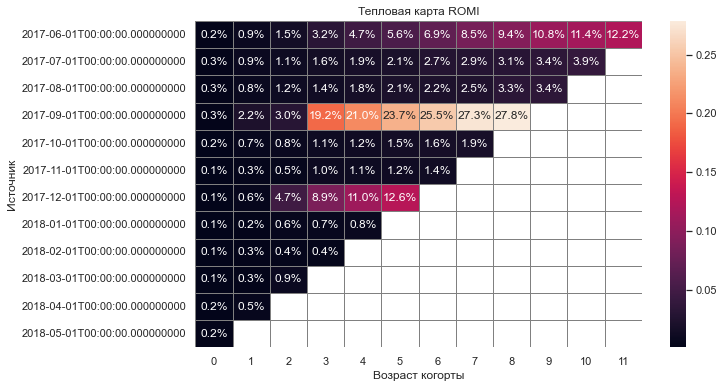

Источник № 3


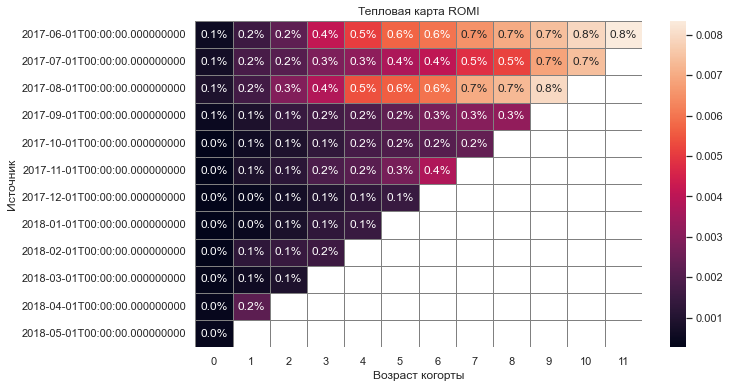

Источник № 4


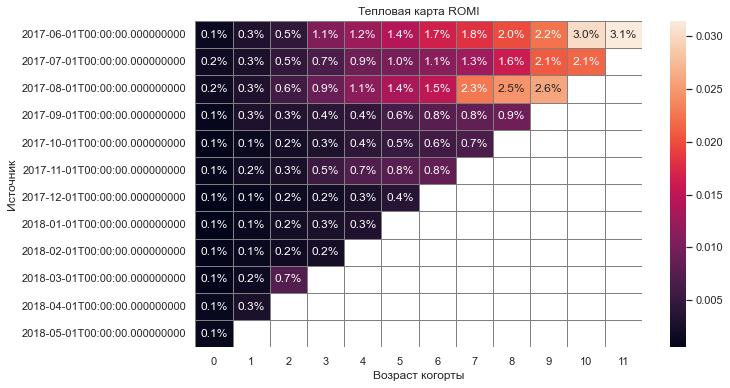

Источник № 5


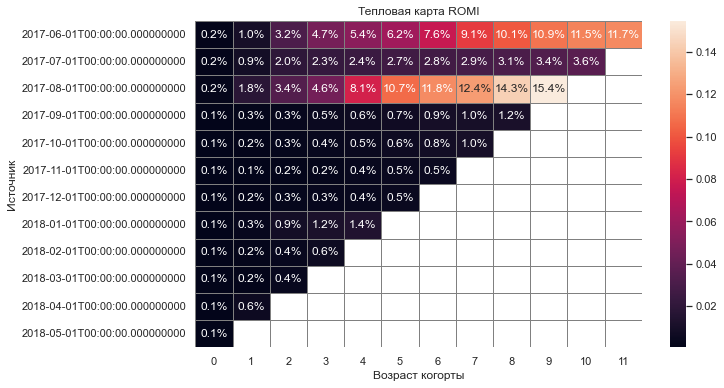

Источник № 9


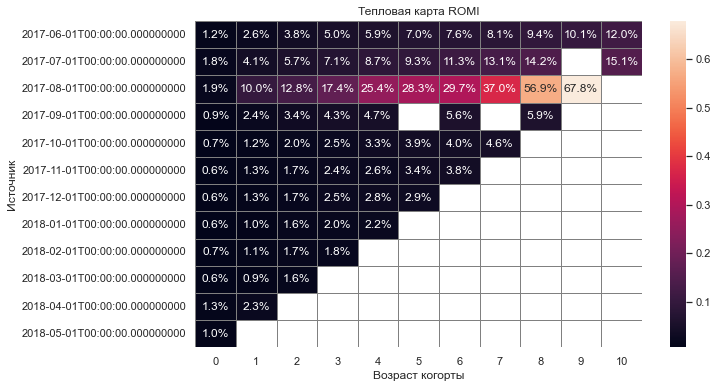

Источник № 10


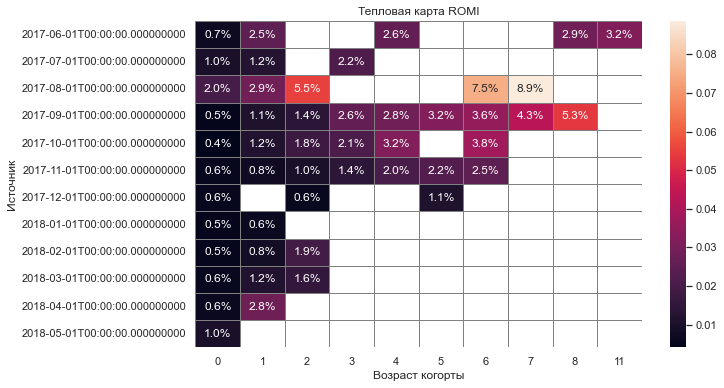

In [61]:

output_romi ={}
for i in uniq_source:
    output_romi[i] = report_new[report_new['source_id'] ==i].pivot_table(
    index='first_orders_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1)    
    print('Источник №', i)
    sns.set(style='white')
    plt.figure(figsize=(10,6))
    plt.title('Тепловая карта ROMI')
    sns.heatmap(output_romi[i], annot=True,  fmt='.1%', linewidths=1, linecolor='gray')
    plt.xlabel("Возраст когорты")
    plt.ylabel('Источник')
    plt.show()

- [картинка 1](img/img12.jpg)
- [картинка 2](img/img13.jpg)
- [картинка 3](img/img14.jpg)
- [картинка 4](img/img15.jpg)



#### Выводы

Самую высокую окупаемость показывает 9й источник, но все еще не окупился

## Шаг 3. Сформулируйте выводы и рекомендации

#### 3.1. Определите источники трафика, на которые маркетологам стоит делать упор. Объясните свой выбор: на какие метрики вы ориентируетесь и почему;

ROMI показывает, что не один источник привлечения не окупается. Самую высокую окупаемость показывает 9й источник, но все еще не окупился.
По показателям CAC видно, что самым удачным источником является 4й, т.к. стоимость 1го покупателя из данного источника в 2,3 раза ниже и привлечено больше кол-во покупателей чем из 3го источника. Так же стоит обратить внимание на 2й и 5й источники

#### 3.2. Опишите выводы, которые вы сделали после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции;

1. Маркетинговые затраты не окупаются
2. По продуктовым и метрикам электронной комерции выражена сезонность. Спад в летний период и значительный всплеск в декабре.



#### 3.3. Подведите итоги когортного анализа. Определите самые перспективные для компании когорты клиентов;

В среднем за 6 месяцев жизни когорт больше всего денег принесла сентябрьская когорта, их показатель LTV значительно выше остальных, при этом значительного всплеска по посещениям сервиса в этот период нет. Вероятнее всего в этот период продавались дорогие билеты

### Шаг 6. Общий вывод

Уволить маркетолога! Затраты на продвижение сильно превышают прибыть :)
За рассмотренный период ни один из источников привлечения клиентов не показывает окупаемость. Нужно пересматривать стратегию продвижения.  
